In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# There are 10 image classes in this dataset and each class has a mapping corresponding to the following labels:

#0 T-shirt/top
#1 Trouser
#2 pullover
#3 Dress
#4 Coat
#5 sandals
#6 shirt
#7 sneaker
#8 bag
#9 ankle boot

# https://ml-course.github.io/master/09%20-%20Convolutional%20Neural%20Networks.pdf

4422102/4422102 [==============================] - 0s 0us/step


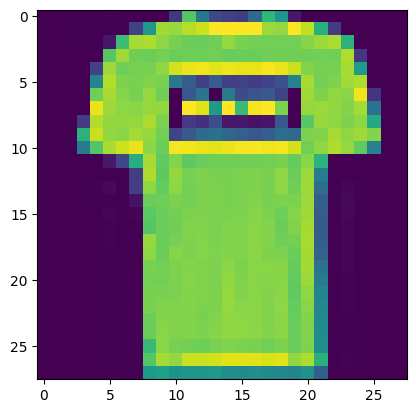

In [ ]:
plt.imshow(x_train[1])

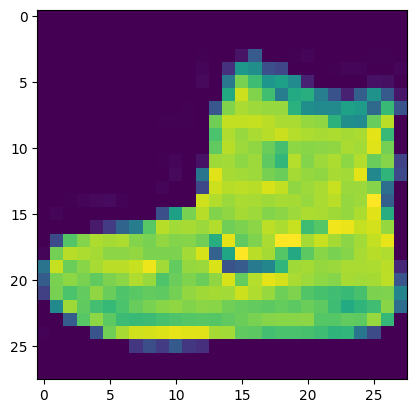

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and then reshaping the images to be 28x28 pixels.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or Tensor when reshaped must remain the same.

# each image is a row vector (784 elements) and there are lots of such rows (let it be n, so there are 784n elements). So TensorFlow can infer that -1 is n.


In [ ]:
# converting the training_images array to 4 dimensional array with sizes 60000, 28, 28, 1 for 0th to 3rd dimension. 

x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# We will use a convolutional neural network (CNN) to classify the fashion items. 
# The CNN will consist of multiple convolutional layers followed by max pooling, 
# dropout, and dense layers. Here is the code for the model:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # 32 filters (default), randomly initialized
    # 3*3 is Size of Filter
    # 28,28,1 size of Input Image
    # No zero-padding: every output 2 pixels less in every dimension
    # in Paramter shwon 320 is value of weights: (3x3 filter weights + 32 bias) * 32 filters
    # 32*3*3=288(Total)+32(bias)= 320


    keras.layers.MaxPooling2D((2,2)),
    # It shown 13 * 13 size image with 32 channel or filter or depth.

    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Deeper layers use 64 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x64 feature map
    # 13(Size)-3(Filter Size )+1(bias)=11 Size for Width and Height with 64 Depth or filtter or channel
    # in Paramter shwon 18496 is value of weights: (3x3 filter weights + 64 bias) * 64 filters
    # 64*3*3=576+1=577*32 + 32(bias)=18496

    keras.layers.MaxPooling2D((2,2)),
    # It shown 5 * 5 size image with 64 channel or filter or depth.

    keras.layers.Dropout(0.25),
        
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Deeper layers use 128 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x128 feature map
    # It show 5(Size)-3(Filter Size )+1(bias)=3 Size for Width and Height with 64 Depth or filtter or channel
    # 128*3*3=1152+1=1153*64 + 64(bias)= 73856

    # To classify the images, we still need a Dense and Softmax layer.
    # We need to flatten the 3x3x128 feature map to a vector of size 1152
    # https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # 128 Size of Node in Dense Layer
    # 1152*128 = 147584

    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
    # 10 Size of Node another Dense Layer
    # 128*10+10 bias= 1290
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875


Epoch 1/10
1875/1875 [==============================] - 90s 47ms/step - loss: 0.5626 - accuracy: 0.7925 - val_loss: 0.4038 - val_accuracy: 0.8508
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3651 - accuracy: 0.8662 - val_loss: 0.3155 - val_accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3176 - accuracy: 0.8838 - val_loss: 0.3183 - val_accuracy: 0.8846
Epoch 4/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2941 - accuracy: 0.8930 - val_loss: 0.2715 - val_accuracy: 0.8997
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2765 - accuracy: 0.8981 - val_loss: 0.2725 - val_accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2641 - accuracy: 0.9026 - val_loss: 0.2562 - val_accuracy: 0.9080
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2506 - accuracy: 0.9070 - val_loss: 0.2545 -

In [ ]:
# Finally, we will evaluate the performance of the model on the test data.

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 10ms/step - loss: 0.2606 - accuracy: 0.9031
Test accuracy: 0.9031000137329102
